# Zonal means of U (ASC) vs T(500m). For OM2-01 RYF experiment

**Requirements:** The `conda/analysis3-22.07` (or later) module on the OOD or Gadi (or your own up-to-date cookbook installation).

In [4]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import os
import xarray as xr
import numpy as np
import IPython.display
import cmocean as cm
import cartopy.crs as ccrs
#from dask.distributed import Client
#client = Client(n_workers=os.cpu_count()-2, threads_per_worker=1)
#client

In [5]:
import cosima_cookbook as cc
session = cc.database.create_session()

I will use the "01deg_jra55v13_iaf_cicle3" experiment (Access-om2-01, repeated year forcing for the early 90's, forced with JRA atmospheric reanalysis)

In [22]:
experiment = '01deg_jra55v13_ryf9091'
variable = 'theta'

varslist = cc.querying.get_variables(session, experiment = experiment)
varslist[varslist['name'].str.lower().str.contains('vhrho_nt')]

,name,long_name,units,frequency,ncfile,cell_methods,# ncfiles,time_start,time_end
150,vhrho_nt,vhrho_nt on horz face of T-cells,(kg/m^3)*m^2/sec,1 daily,output1115/ocean/ocean_daily_3d_vhrho_nt.nc,time: mean,245,1965-01-01 00:00:00,2180-01-01 00:00:00
357,vhrho_nt,vhrho_nt on horz face of T-cells,(kg/m^3)*m^2/sec,3 hourly,output963/ocean/rregionPrydz_vhrho_nt.nc,time: mean,4,2141-01-01 00:00:00,2142-01-01 00:00:00


In [10]:
#Getting variables
#variable = 'uvel'
ni=-20 #number of netcdfs to read
UVEL = cc.querying.getvar(experiment, 'u' , session, frequency='1 monthly',n=ni)#,n=-60
UVEL = UVEL.isel({'yu_ocean': slice(0, 494)}).isel({'st_ocean': slice(0, 40)})# First 500 m
#TEMP = cc.querying.getvar(experiment, 'pot_temp' , session, frequency='1 monthly',n=ni)
#TEMP = TEMP.isel({'yt_ocean': slice(0, 494)}).isel({'st_ocean': slice(0, 40)})# First 500 m
dzt = cc.querying.getvar(experiment, 'dzt' , session, frequency='1 monthly',n=ni)
dzt = dzt.isel({'yt_ocean': slice(0, 494)}).isel({'st_ocean': slice(0, 40)})
# To minimize computational efforts you can....
      # Set ylim to get only the Southermost Latitudes of the Southern Ocean (Lets say south of 60S)
      # Set a depth limit too.. perhaps 1000m or 500 m
      #When I calculate the mean it has to be a weighted mean against dzt

In [8]:
%%time
# Calculating Mean V and U along time
UVELzm = UVEL.sel({'xu_ocean': slice(-245, -235)}).mean('xu_ocean').compute()
UVELmean = UVELzm.mean('time')
dztmean = dzt.mean('time').compute()
#TEMPzm = TEMP.sel({'xt_ocean': slice(-245, -235)}).mean('xt_ocean').compute()
#TEMPmean = TEMPzm.mean('time')

CPU times: user 3min 41s, sys: 17.3 s, total: 3min 58s
Wall time: 6min 25s


In [9]:
# Plotting the mean U at the location of the 1000m bath
UVELzminv=UVELzm.min(dim='st_ocean').sel(yu_ocean=-65.46, method='nearest')
#UVELzminv = UVELzmin.groupby('time.year').mean(dim='time')
#TEMPzmv=TEMPzm.sel({'yt_ocean': slice(-80, -65.46)}).max(dim='st_ocean').mean(dim='yt_ocean')
#TEMPzmv = TEMPzmin.groupby('time.year').mean(dim='time')

In [11]:
#heat transport obtained from  Corss-contour_tranport.ipynb
TIS_t=np.array([ -50851.28214375, -104315.10302483, -131493.19501785,
       -203693.72943759, -180636.09915447, -128441.4347505 ,
       -143153.03939167,  -85764.64762148,  -96660.19766004,
        -54276.6527828 ,  -72111.22941349,  -41077.83147855,
        -53260.89799542, -101815.17843778, -139822.04446322,
       -210992.62554289, -184504.16134563, -137403.64967619,
       -142648.77538338,  -85758.80781239,  -97698.3791936 ,
        -52403.43191317,  -65286.0343343 ,  -47893.65456725,
        -59060.08110882,  -97806.95204285, -131651.26873677,
       -202193.34334431, -184707.4762903 , -130626.6937942 ,
       -144283.66155012,  -85364.63257014,  -96837.32238182,
        -52901.38344984,  -63528.24024484,  -36235.75905244,
        -54061.49157583,  -92313.32624969, -129207.69225492,
       -198169.35690897, -184418.95010436, -136603.40823975,
       -137683.07828501,  -91624.78949755,  -99725.3447364 ,
        -50453.42512671,  -63240.66666801,  -40389.24333203,
        -50165.25281088,  -94680.12800362, -133103.28126952,
       -196754.46386337, -182164.84868906, -134699.7871954 ,
       -144231.4705387 ,  -86476.46915567,  -95712.33518449,
        -55406.78386419,  -62988.11475704,  -41300.86521524])

In [12]:
UVELzminv

<xarray.DataArray 'u' (time: 60)>
array([-0.04667759, -0.07166641, -0.10190304, -0.16358395, -0.15877712,
       -0.13304956, -0.19187288, -0.12355512, -0.09547701, -0.06063233,
       -0.06168367, -0.04936548, -0.03938847, -0.06214255, -0.09835505,
       -0.16994968, -0.15244898, -0.12615056, -0.18621483, -0.12061319,
       -0.09303275, -0.05960862, -0.06438012, -0.05421536, -0.04250155,
       -0.07504403, -0.10661497, -0.16772527, -0.15808809, -0.12744296,
       -0.19185238, -0.11957761, -0.09769127, -0.06023627, -0.06544119,
       -0.05456451, -0.04754903, -0.07080746, -0.10082405, -0.16407734,
       -0.15590434, -0.13554636, -0.18921566, -0.12073354, -0.09457073,
       -0.058979  , -0.06484267, -0.05758479, -0.04813009, -0.06790959,
       -0.09860367, -0.16412708, -0.1526861 , -0.13253587, -0.1931225 ,
       -0.119741  , -0.10125532, -0.06036388, -0.07115638, -0.056066  ],
      dtype=float32)
Coordinates:
  * time      (time) object 2175-01-16 12:00:00 ... 2179-12-16 12:00:00
    yu_ocean  float64 -65.46

Text(0.5, 1.0, 'Totten Ice Shelf')

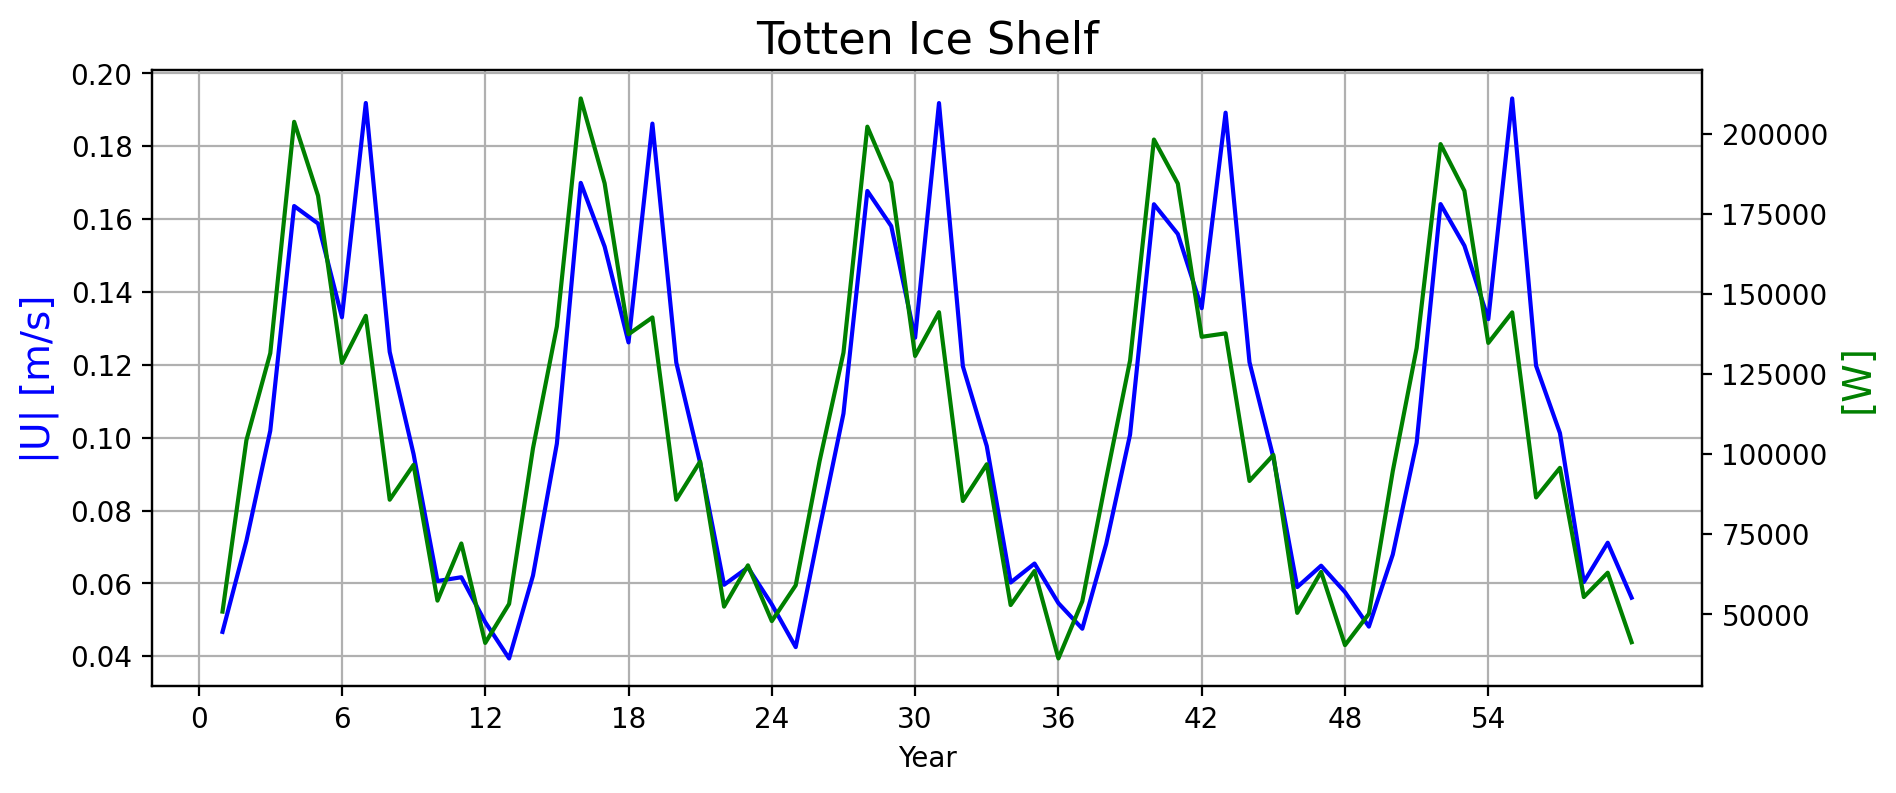

In [15]:
fig, ax1 = plt.subplots(figsize = (10, 4))
ax2 = ax1.twinx()

ax1.plot(np.linspace(1,60,60),-UVELzminv, 'b-')
#ax1.plot(UVELmeanz2['yt_ocean'].sel(yt_ocean=-65.46, method='nearest'), UVELmeanz2.sel(yt_ocean=-65.46, method='nearest'), 'k*')
ax1.set_xlabel('Year')
ax1.set_ylabel('|U| [m/s]', color='b', fontsize=14)
ax1.grid()
plt.xticks(np.arange(0,60,6))
#Uvel
ax2.plot(np.linspace(1,60,60),abs(TIS_t), 'g-')#TEMPzmv-273.15
#ax2.grid()
ax2.set_ylabel('[W]', color='g', fontsize=14)
plt.title('Totten Ice Shelf', fontsize=16)

In [ ]:
# A stronger westward U transport seem to be correlated to a stronger polarward heat transport. Again, doesn't seem to make sense

In [18]:
%%time
#For Amery ice Shelf
# Plotting the mean U at the location of the 1000m bath

# Calculating Mean V and U along time
UVELzma = UVEL.sel({'xu_ocean': slice(68, 80)}).mean('xu_ocean').compute()
UVELmeana = UVELzma.mean('time')
#TEMPzma = TEMP.sel({'xt_ocean': slice(68, 80)}).mean('xt_ocean').compute()
#TEMPmeana = TEMPzma.mean('time')



UVELzminva=UVELzma.min(dim='st_ocean').sel(yu_ocean=-66.77, method='nearest')
#UVELzminva = UVELzmina.groupby('time.year').mean(dim='time')
#TEMPzmva=TEMPzma.sel({'yt_ocean': slice(-80, -66.77)}).max(dim='st_ocean').mean(dim='yt_ocean')
#TEMPzmva = TEMPzmina.groupby('time.year').mean(dim='time')

CPU times: user 16.2 s, sys: 1.76 s, total: 17.9 s
Wall time: 31.6 s


In [16]:
# Heat transport obtained from Corss-contour_tranport.ipynb
AIS_t=np.array([ -1.66013687e+06, -3.17986163e+07, -4.02635647e+07, -6.36077266e+07,
       -7.63818972e+07, -4.11229551e+07, -6.92566085e+07, -2.31710633e+07,
       -9.85396147e+06, -1.87806994e+07, -4.37429121e+06,  3.47993517e+06,
        1.27827039e+06, -2.78238359e+07, -3.96077562e+07, -6.64927364e+07,
       -7.69344579e+07, -4.20875810e+07, -6.59106190e+07, -2.40223426e+07,
       -1.10387598e+07, -1.92171597e+07, -5.89242114e+06, -7.61767439e+05,
       -3.49326886e+06, -3.20956604e+07, -3.95843964e+07, -6.60129017e+07,
       -7.81068330e+07, -4.13447902e+07, -6.99272609e+07, -2.45298040e+07,
       -1.10375769e+07, -1.97708952e+07, -6.56781909e+06, -5.84325088e+05,
       -3.16255299e+06, -3.03279419e+07, -4.27571763e+07, -6.46192552e+07,
       -7.64239641e+07, -3.99320472e+07, -6.73315032e+07, -2.33071275e+07,
       -1.12935508e+07, -1.87431244e+07, -6.00099113e+06, -4.97535998e+05,
       -6.00064628e+04, -3.14298153e+07, -3.91641849e+07, -6.27644116e+07,
       -7.54987100e+07, -3.81854012e+07, -6.72434400e+07, -2.18668654e+07,
       -8.47268990e+06, -1.93812442e+07, -5.01230851e+06,  2.58370153e+05])

Text(0.5, 1.0, 'Amery Ice Shelf')

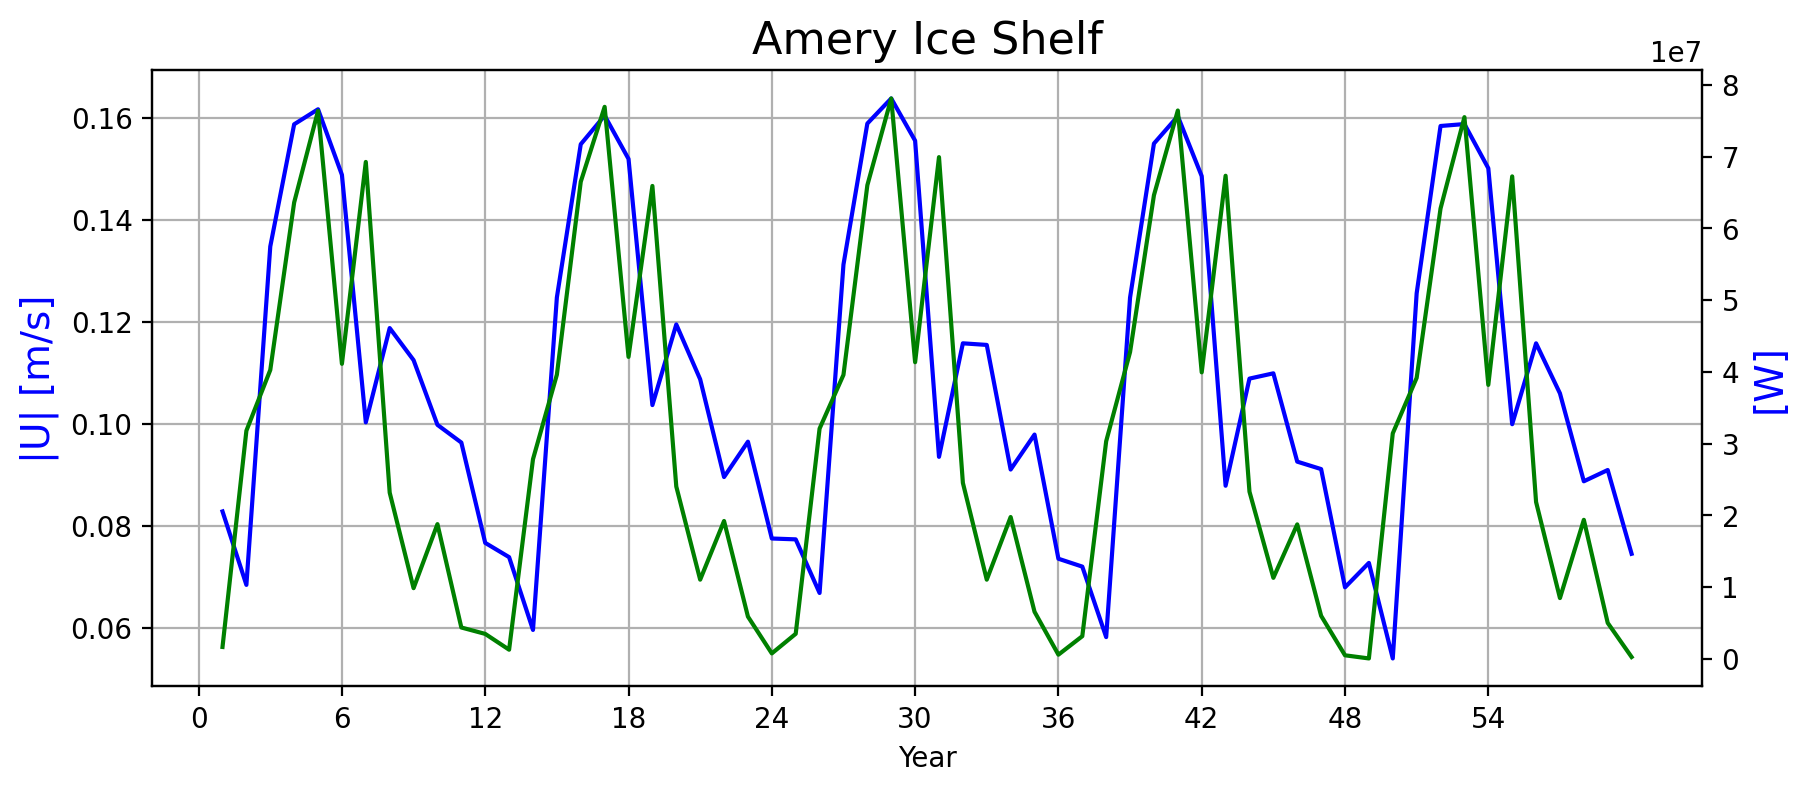

In [21]:
fig, ax1 = plt.subplots(figsize = (10, 4))
ax2 = ax1.twinx()

ax1.plot(np.linspace(1,60,60),-UVELzminva, 'b-')
#ax1.plot(UVELmeanz2['yt_ocean'].sel(yt_ocean=-65.46, method='nearest'), UVELmeanz2.sel(yt_ocean=-65.46, method='nearest'), 'k*')
ax1.set_xlabel('Year')
ax1.set_ylabel('|U| [m/s]', color='b', fontsize=14)
ax1.grid()
plt.xticks(np.arange(0,60,6))
#Uvel
ax2.plot(np.linspace(1,60,60),abs(AIS_t), 'g-')
#ax2.grid()
ax2.set_ylabel('[W]', color='b', fontsize=14)
plt.title('Amery Ice Shelf', fontsize=16)

In [ ]:
#On a monthly timescale, the temperature signal and the U signal have a really interesting correlation. 
#This result indeed does suggest that stronger U hidner heat transport to the coast